### Paper 1
GRNN

use MRMR to find the best features?

Ensemble approach using soft voting

### Paper 2
ARTMAP

### Paper 3
Naive Bayes and Decision Trees

### Paper 4
KNN, SVM with linear and non-linear-Kernel SVM, Naïve Bayes, Logistic Regression and also the Decision Tree and Random Forest Classification for accuracy validation with statistical modelling

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import VotingClassifier

### PART 1
Ensemble method

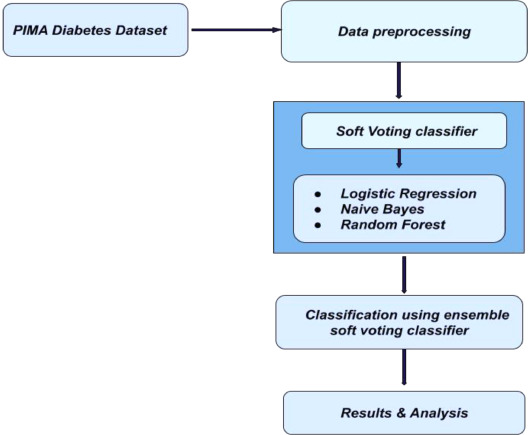

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

#### Part 1
Visualize data

In [72]:
# Load the dataset
diabetes_df = pd.read_csv('/diabetes.csv')
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                       
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
Pregnancies,6.000000,1.000000,8.000000,1.000000,0.000000
Glucose,148.000000,85.000000,183.000000,89.000000,137.000000
BloodPressure,72.000000,66.000000,64.000000,66.000000,40.000000
SkinThickness,35.000000,29.000000,0.000000,23.000000,35.000000
Insulin,0.000000,0.000000,0.000000,94.000000,168.000000
BMI,33.600000,26.600000,23.300000,28.100000,43.100000
DiabetesPedigreeFunction,0.627000,0.351000,0.672000,0.167000,2.288000
Age,50.000000,31.000000,32.000000,21.000000,33.000000
Outcome,1.000000,0.000000,1.000000,0.000000,1.000000


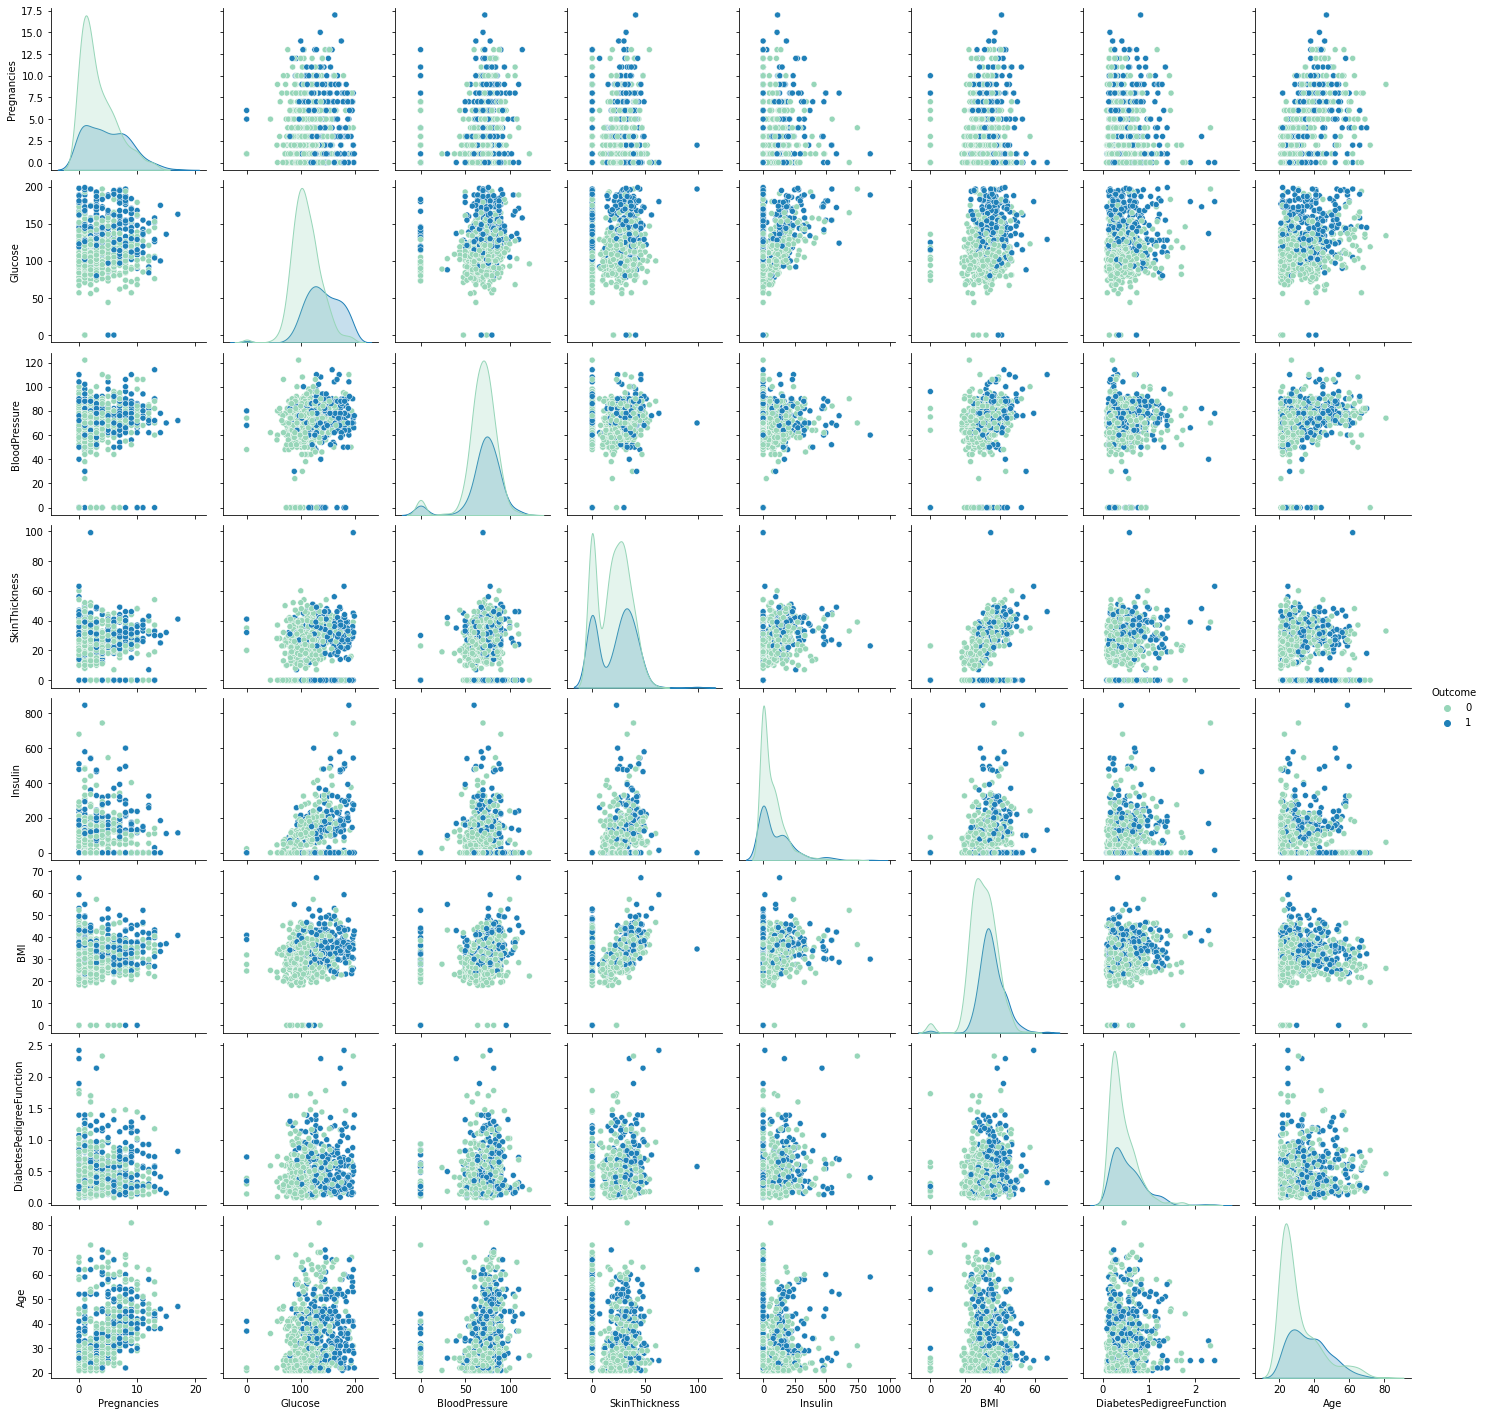

In [4]:
import seaborn as sns
g = sns.pairplot(diabetes_df, hue="Outcome", palette="YlGnBu")

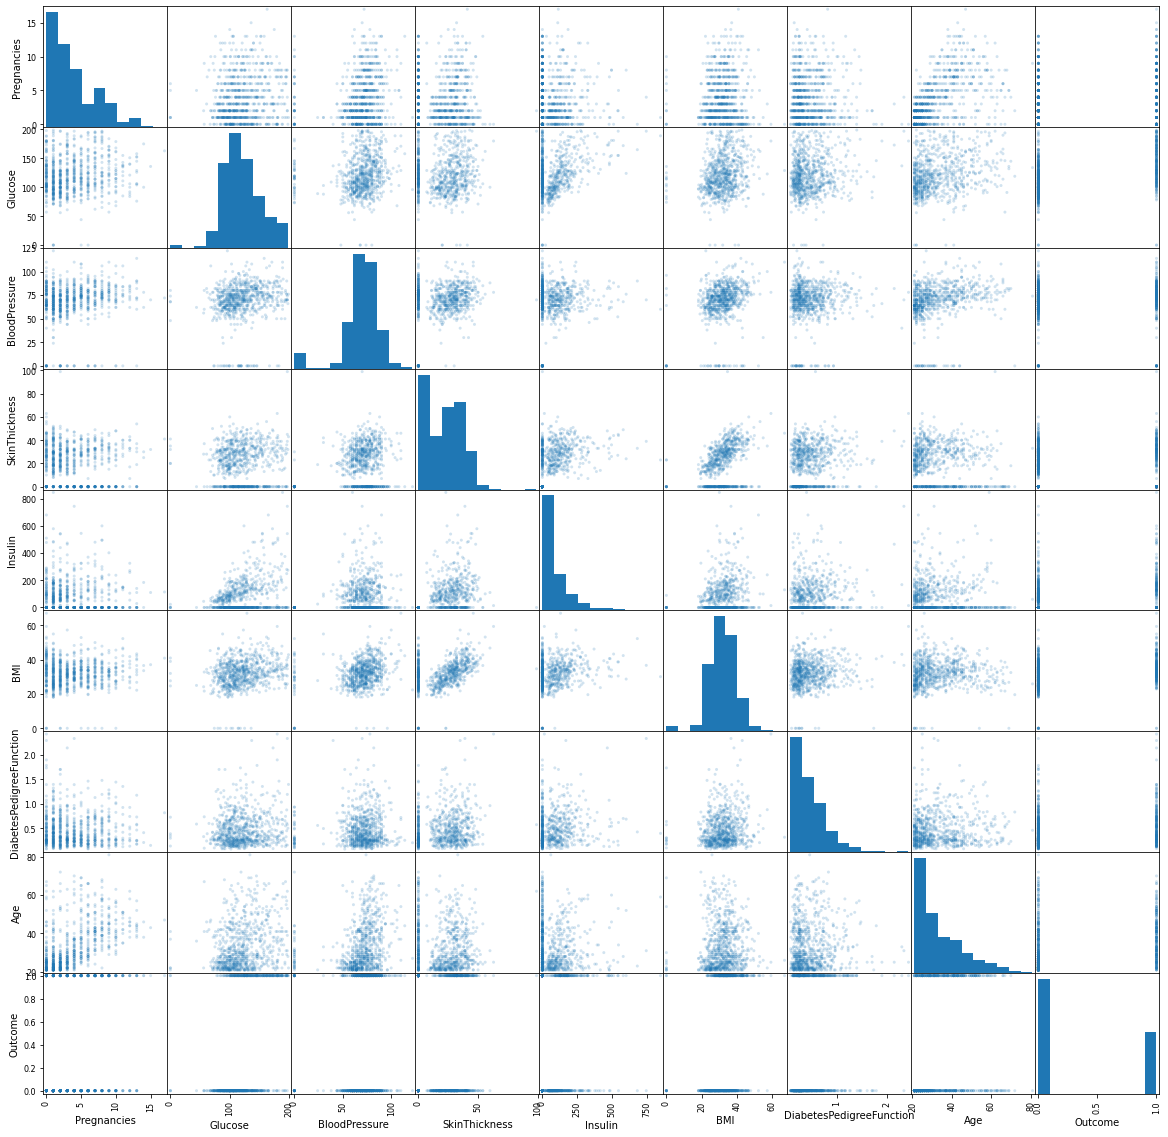

In [ ]:
pd.plotting.scatter_matrix(diabetes_df, alpha=0.2, figsize=(20,20))
plt.show()

In [63]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Utility functions

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [64]:
colors = ['blue', 'red']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

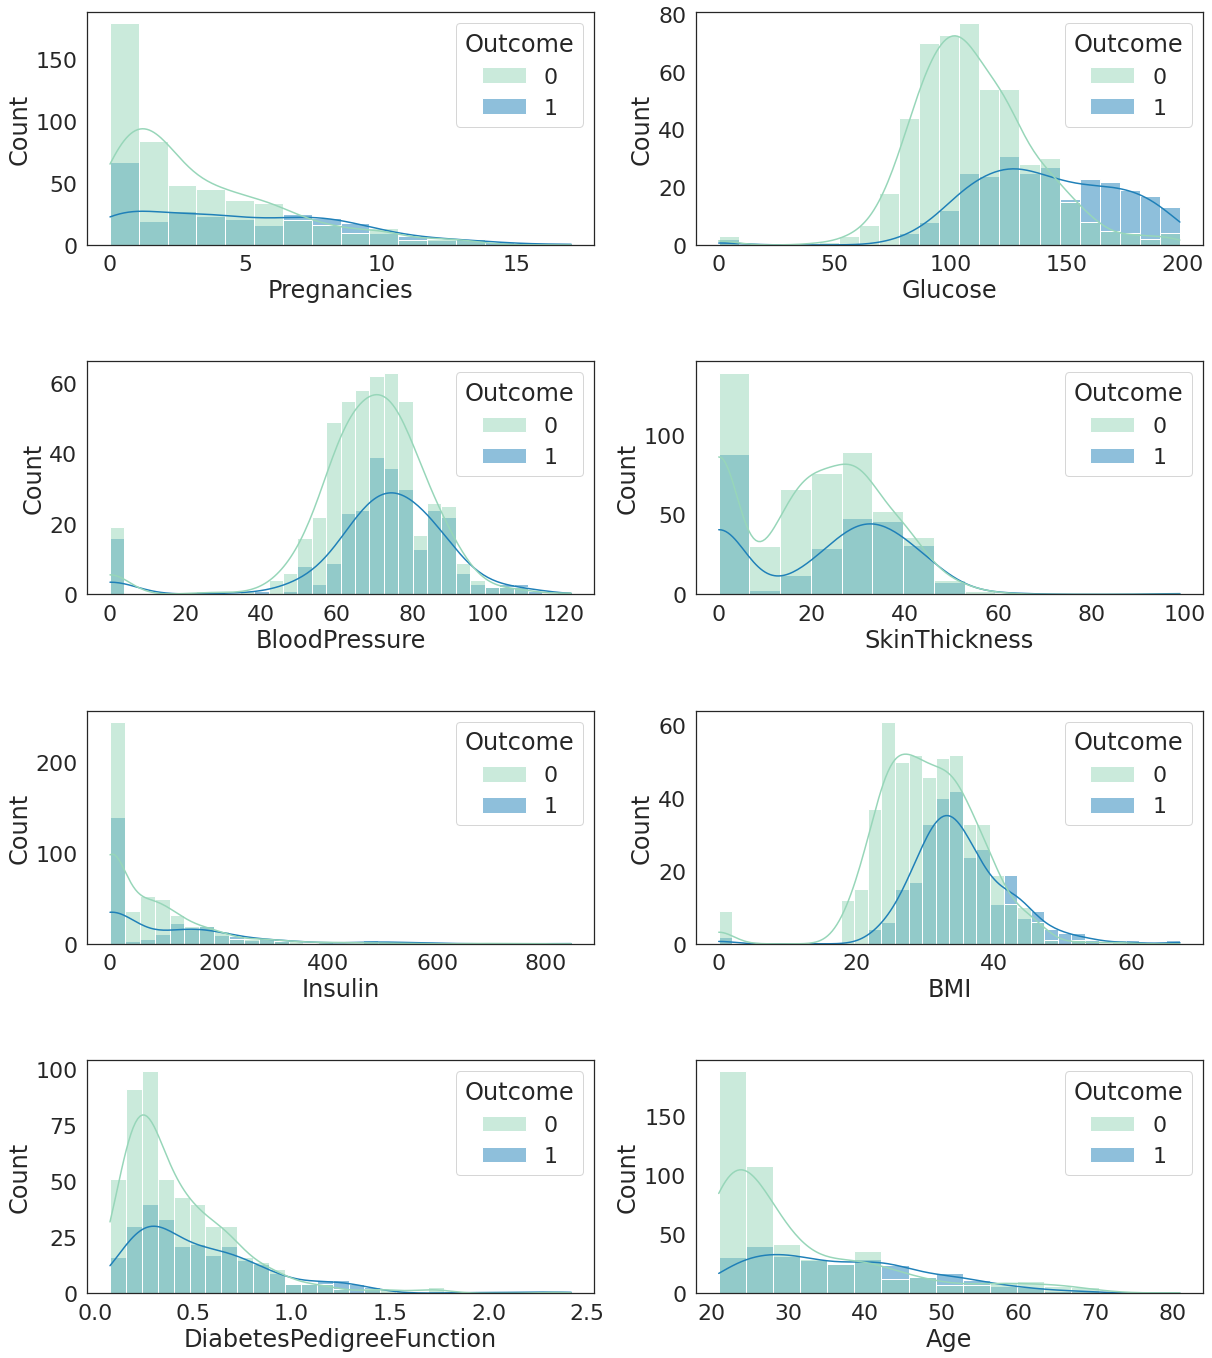

In [65]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]
rcParams['figure.figsize'] = 20,30
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

Text(0.5, 1.0, 'Correlation Plot')

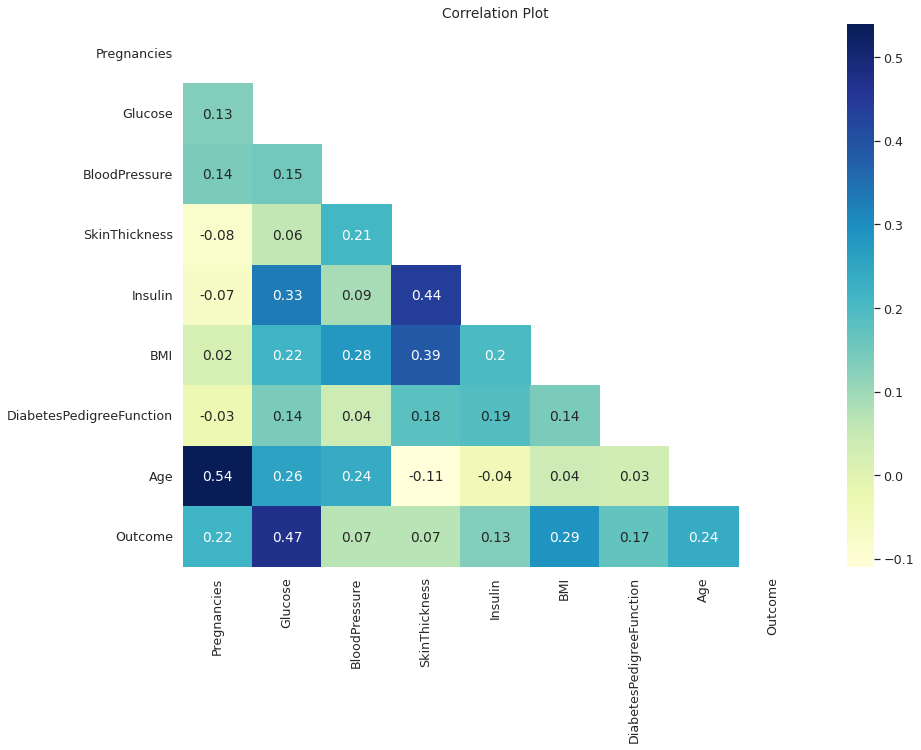

In [66]:
## Correlation between features

corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.color_palette("husl", 8)
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu")
plt.title('Correlation Plot')

#### Part 2
Pre-process data

1. Normalize between range [0,1]
2. Label encoding the dependent variable (outcome) from a string to an integer
3. Replace 0 values with median of the dataset column

In [15]:
## 1: Normalize
diabetes_normalize = preprocessing.normalize(diabetes_df.drop('Outcome', axis=1), axis=1)
diabetes_normalize
diabetes = pd.DataFrame(diabetes_normalize, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
diabetes['Outcome'] = diabetes_df['Outcome']

In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.022645,0.682903,0.402801,0.112086,0.318921,0.186874,0.002710,0.195434,0.348958
std,0.020956,0.161166,0.153428,0.092546,0.338570,0.063402,0.001902,0.080940,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000250,0.032460,0.000000
25%,0.006476,0.587637,0.317522,0.000000,0.000000,0.146291,0.001379,0.139930,0.000000
50%,0.016716,0.704501,0.430685,0.114464,0.249215,0.186167,0.002159,0.181108,0.000000
75%,0.033330,0.801606,0.511070,0.181524,0.632833,0.226831,0.003507,0.239313,1.000000
max,0.117208,0.973682,0.848036,0.419691,0.970458,0.400734,0.013417,0.616539,1.000000


In [67]:
## 2: Label encoding the dependent variable
le = preprocessing.LabelEncoder()
le.fit(diabetes_df['Outcome'])
list(le.classes_)

[0, 1]

In [68]:
## 3: Find zero features and replace with the mean of the column
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = diabetes_df['Outcome'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases is {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases is 111, percent is 14.45 %
Glucose 0 number of cases is 5, percent is 0.65 %
BloodPressure 0 number of cases is 35, percent is 4.56 %
SkinThickness 0 number of cases is 227, percent is 29.56 %
Insulin 0 number of cases is 374, percent is 48.70 %
BMI 0 number of cases is 11, percent is 1.43 %


In [69]:
diabetes_median = diabetes_df[zero_features].median()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_median)

In [70]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Part 3
1. Logistic Regression
2. Naive Bayes
3. Random Forest
4. Soft Voting

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

y = diabetes_df['Outcome'].values
X = diabetes_df.drop(columns=['Outcome'], axis=1)
#diabetes['Outcome'] = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

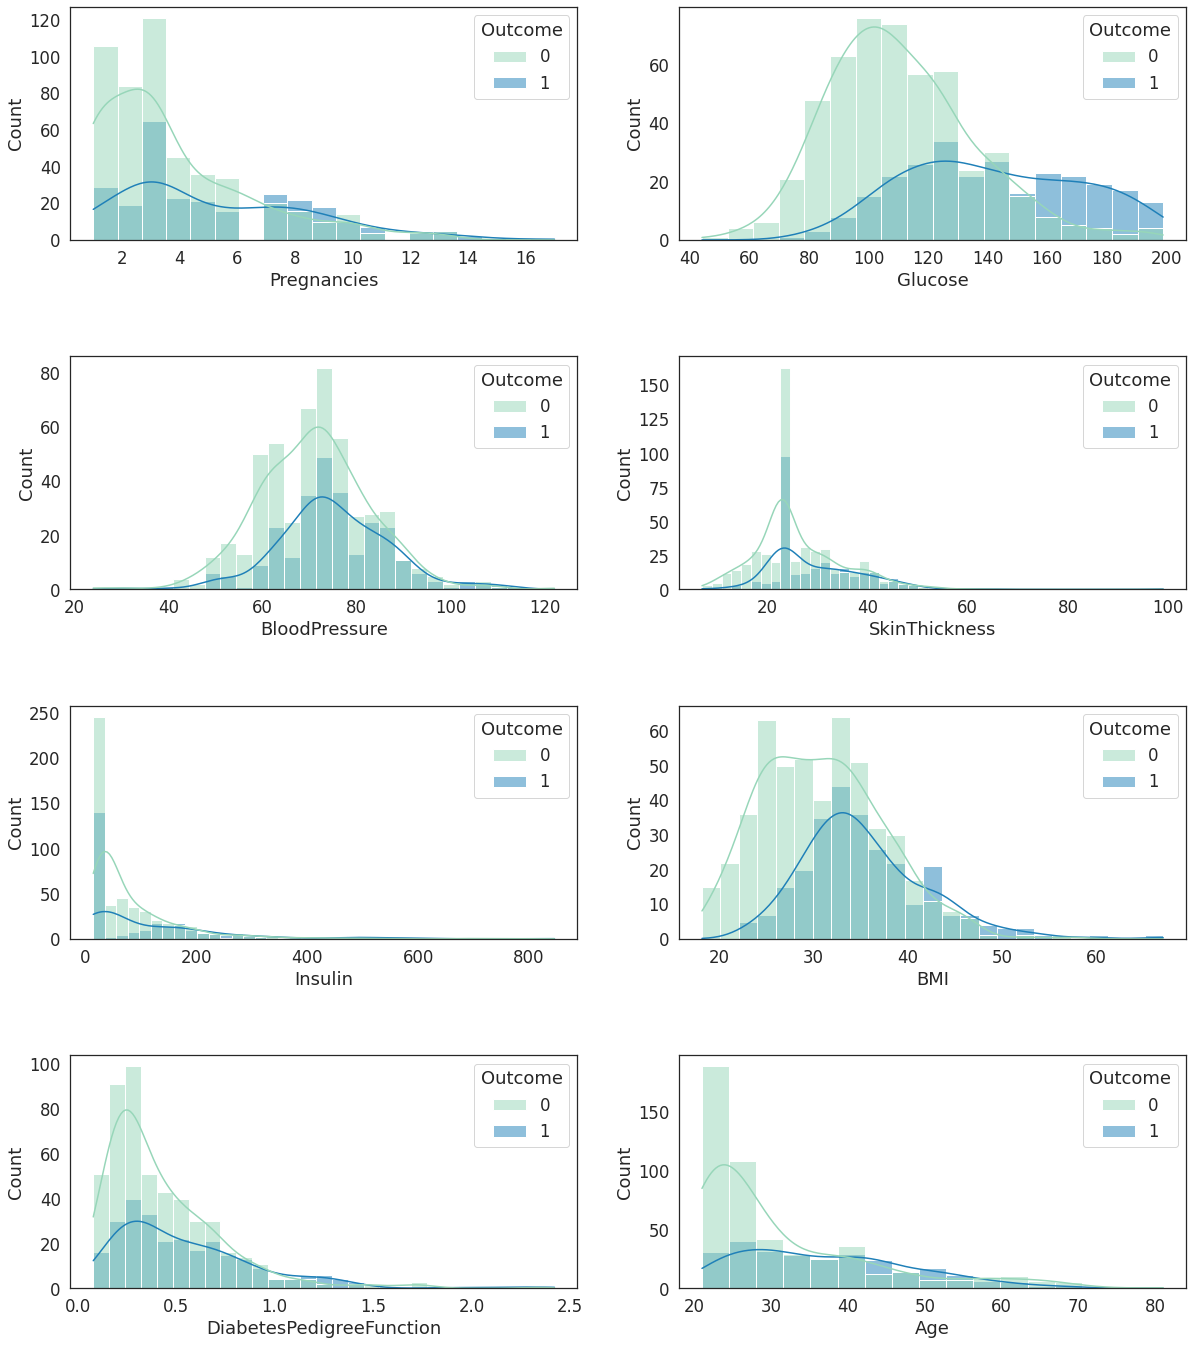

In [59]:
rcParams['figure.figsize'] = 20,30
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

Text(0.5, 1.0, 'Correlation Plot')

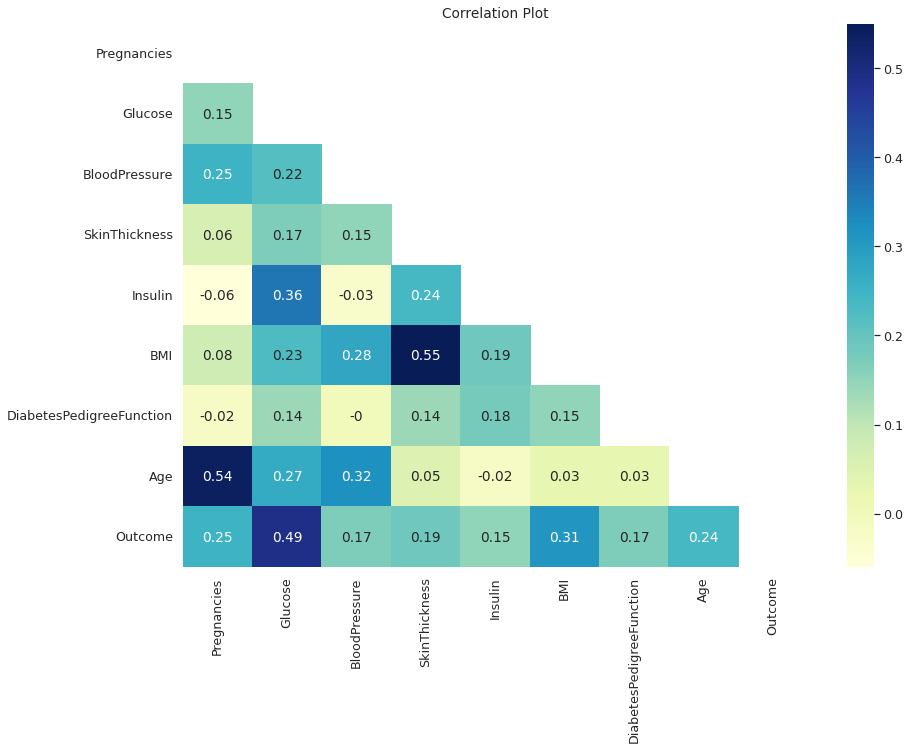

In [71]:
## Correlation between features after normalizing

corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.color_palette("husl", 8)
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu")
plt.title('Correlation Plot')

In [97]:
scores = {name: [] for name in ('score', 'LR', 'GNB', 'RF')}

for seed in range (1, 100+1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)
  lr_score = log_reg.score(X_test, y_test)
  #print("LR Score:", lr_score)
  scores['LR'].append(lr_score)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  gnb_score = gnb.score(X_test, y_test)
  #print("GNB Score:", gnb_score)
  scores['GNB'].append(gnb_score)

  clf = RandomForestClassifier(max_depth=2, random_state=seed)
  clf.fit(X, y)
  rf_score = clf.score(X_test, y_test)
  #print("RF Score:", rf_score)
  scores['RF'].append(rf_score)

  scores['score'].append(seed)

df = pd.DataFrame.from_dict(scores)
lr_max = df['LR'].max()
lr_max_df = df[df['LR']==df['LR'].max()]
lr_max_seed = lr_max_df['score']
gnb_max = df['GNB'].max()
gnb_max_df = df[df['LR']==df['LR'].max()]
gnb_max_seed = lr_max_df['score']
rf_max = df['RF'].max()
rf_max_df = df[df['LR']==df['LR'].max()]
rf_max_seed = lr_max_df['score']

In [98]:
print("Seed: {}, Accuracy: {}".format(lr_max_seed, lr_max))
print("Seed: {}, Accuracy: {}".format(gnb_max_seed, gnb_max))
print("Seed: {}, Accuracy: {}".format(rf_max_seed, rf_max))

Seed: 73    74
Name: score, dtype: int64, Accuracy: 0.8385416666666666
Seed: 73    74
Name: score, dtype: int64, Accuracy: 0.8177083333333334
Seed: 73    74
Name: score, dtype: int64, Accuracy: 0.8177083333333334


In [99]:
print(lr_max_seed)

73    74
Name: score, dtype: int64


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=74)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
lr_score = log_reg.score(X_test, y_test)
print("LR Score:", lr_score)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_score = gnb.score(X_test, y_test)
print("GNB Score:", gnb_score)

clf = RandomForestClassifier(max_depth=5, random_state=74)
clf.fit(X, y)
rf_score = clf.score(X_test, y_test)
print("RF Score:", rf_score)

LR Score: 0.8385416666666666
GNB Score: 0.8177083333333334
RF Score: 0.8645833333333334


In [112]:
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('LR',log_reg), ('GNB', gnb), ('RF', clf)], voting='soft', weights=[2,1,4])
eclf.fit(X_train, y_train)
eclf_score = eclf.score(X_test, y_test)
y_pred = eclf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["diabetic", "non-diabetic"]))


              precision    recall  f1-score   support

    diabetic       0.83      0.94      0.88       128
non-diabetic       0.83      0.61      0.70        64

    accuracy                           0.83       192
   macro avg       0.83      0.77      0.79       192
weighted avg       0.83      0.83      0.82       192



To do at the end:
1. Confusion matrix
2. F measure
3. Classification Report
4. 

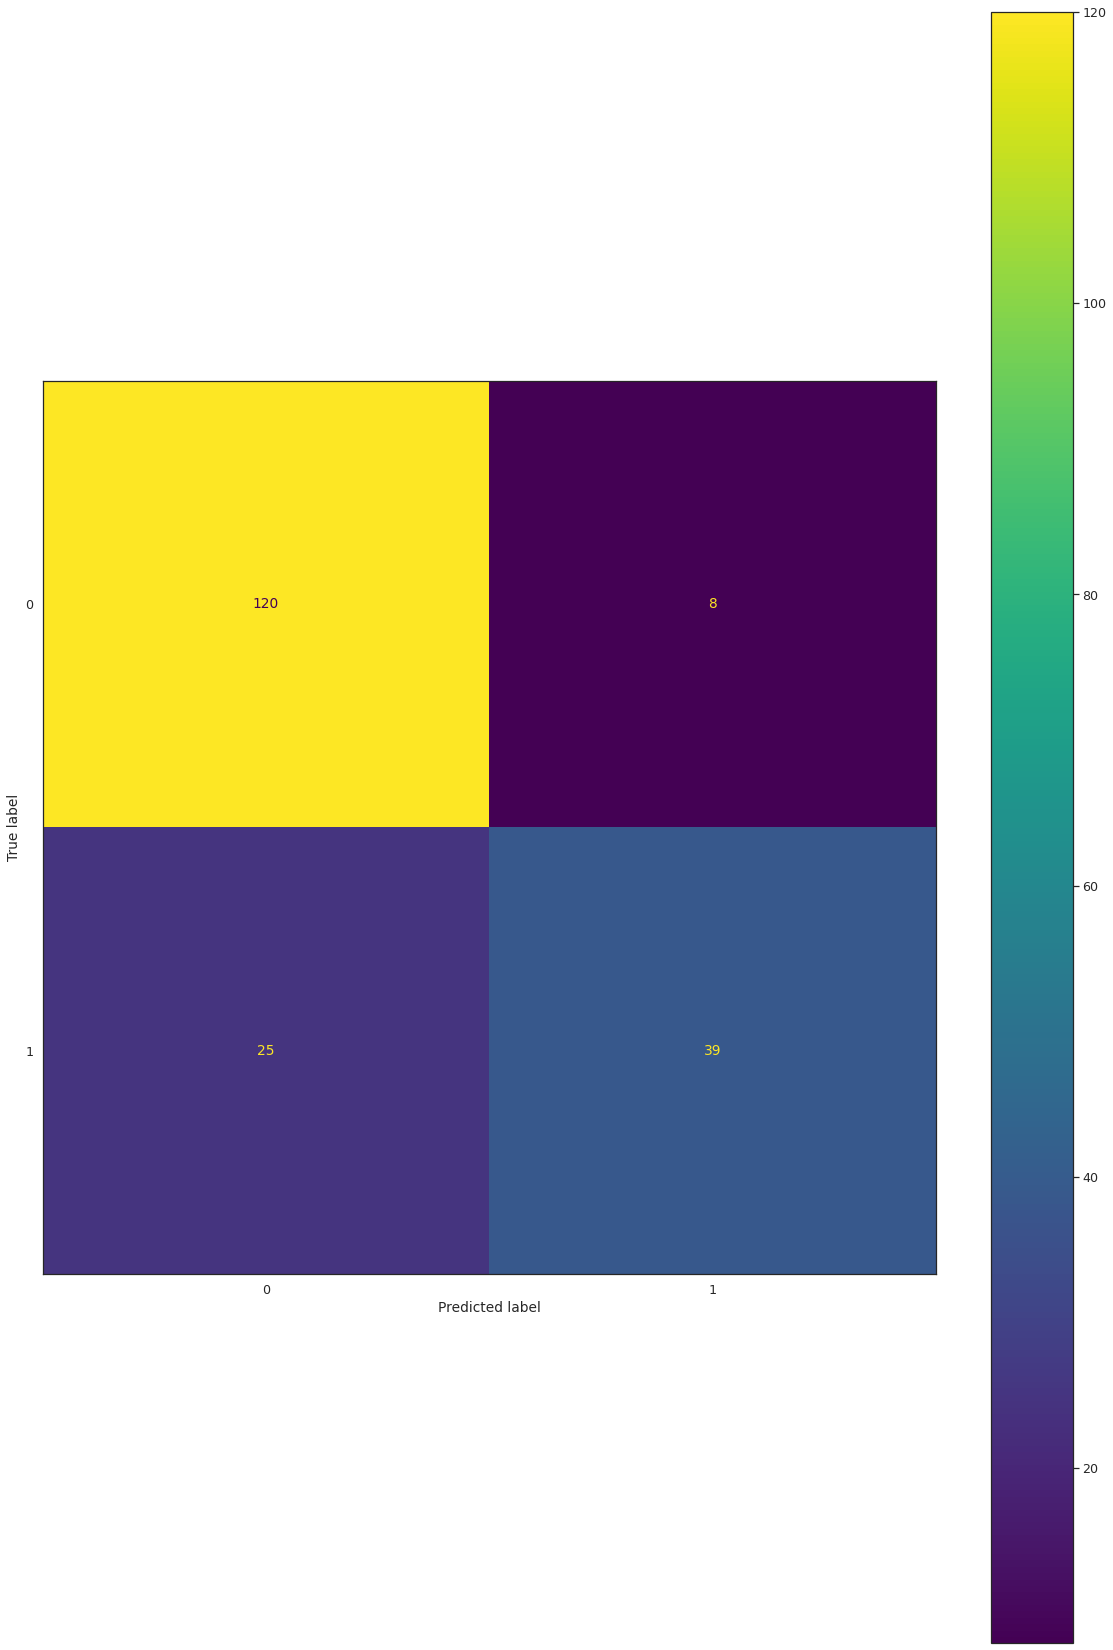

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=eclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=eclf.classes_)
disp.plot()
plt.show()